# Phase 1: Data Preprocessing & Initial Exploration (EDA - Part 1)

In [1]:
import pandas as pd
import numpy as np

### Load the dataset

In [2]:
try:
    df = pd.read_csv('online_retail.csv', encoding='ISO-8859-1')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'online_retail.csv' not found. Please ensure the file is in the correct directory.")
    exit()

Dataset loaded successfully!


### Explore the dataset to understand the structure and data types

In [3]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [4]:
print("\nDataset Information (Data Types, Non-Null Counts):")
df.info()


Dataset Information (Data Types, Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
print("\nShape of the dataset (rows, columns):", df.shape)


Shape of the dataset (rows, columns): (541909, 8)


### Identify missing values, duplicates, and unusual records

In [6]:
print("\n--- Missing Values Check ---")
print(df.isnull().sum())


--- Missing Values Check ---
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
print("\n--- Duplicate Rows Check ---")
print(f"Number of duplicate rows: {df.duplicated().sum()}")


--- Duplicate Rows Check ---
Number of duplicate rows: 5268


### Data Preprocessing (as per project requirements)

In [8]:
# 1. Remove rows with missing CustomerID 
initial_rows = df.shape[0]
df.dropna(subset=['CustomerID'], inplace=True)
print(f"\nRemoved {initial_rows - df.shape[0]} rows with missing CustomerID.")
print(f"New shape after dropping missing CustomerID: {df.shape}")


Removed 135080 rows with missing CustomerID.
New shape after dropping missing CustomerID: (406829, 8)


In [9]:
# 2. Exclude cancelled invoices (InvoiceNo starting with 'C') 
initial_rows = df.shape[0]
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
print(f"Removed {initial_rows - df.shape[0]} rows corresponding to cancelled invoices.")
print(f"New shape after removing cancelled invoices: {df.shape}")

Removed 8905 rows corresponding to cancelled invoices.
New shape after removing cancelled invoices: (397924, 8)


In [10]:
# 3. Remove negative or zero quantities and prices 
initial_rows = df.shape[0]
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
print(f"Removed {initial_rows - df.shape[0]} rows with non-positive Quantity or UnitPrice.")
print(f"New shape after removing non-positive quantity/price: {df.shape}")

Removed 40 rows with non-positive Quantity or UnitPrice.
New shape after removing non-positive quantity/price: (397884, 8)


In [11]:
print("\nUpdated Dataset Information:")
df.info()


Updated Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [12]:
print("\nFinal shape of the cleaned dataset:", df.shape)
print("\nSample of cleaned data:")
print(df.head())


Final shape of the cleaned dataset: (397884, 8)

Sample of cleaned data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  


# Phase 2: Feature Engineering for RFM & Deeper EDA (EDA - Part 2)

In [28]:
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Convert InvoiceDate to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

### Feature Engineering (RFM)

In [15]:
# Calculate the latest date in the dataset to determine Recency reference point
# We add one day to the max date to ensure Recency is calculated correctly as days since last purchase
latest_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
print(f"\nLatest transaction date in the dataset: {df['InvoiceDate'].max().strftime('%Y-%m-%d')}")
print(f"Reference date for Recency calculation: {latest_date.strftime('%Y-%m-%d')}")


Latest transaction date in the dataset: 2023-12-09
Reference date for Recency calculation: 2023-12-10


In [16]:
# Calculate Monetary (Total amount spent per transaction)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [17]:
# Group by CustomerID to calculate RFM values
rfm_df = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda date: (latest_date - date.max()).days), # Days since last purchase
    Frequency=('InvoiceNo', 'nunique'),                                  # Number of unique transactions
    Monetary=('TotalPrice', 'sum')                                      # Total amount spent
).reset_index()

In [18]:
print("\n--- RFM Features Calculated ---")
print("First 5 rows of RFM DataFrame:")
print(rfm_df.head())
print("\nRFM DataFrame Info:")
rfm_df.info()


--- RFM Features Calculated ---
First 5 rows of RFM DataFrame:
   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40

RFM DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4338 non-null   float64
 1   Recency     4338 non-null   int64  
 2   Frequency   4338 non-null   int64  
 3   Monetary    4338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.7 KB


### Deeper Exploratory Data Analysis (EDA - Part 2)


--- Transaction Volume by Country (Top 10) ---
Country
United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1462
Australia           1182
Name: count, dtype: int64


C:\Users\hanum\AppData\Local\Temp\ipykernel_38556\4280711352.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_transactions.index, y=country_transactions.values, palette='viridis')


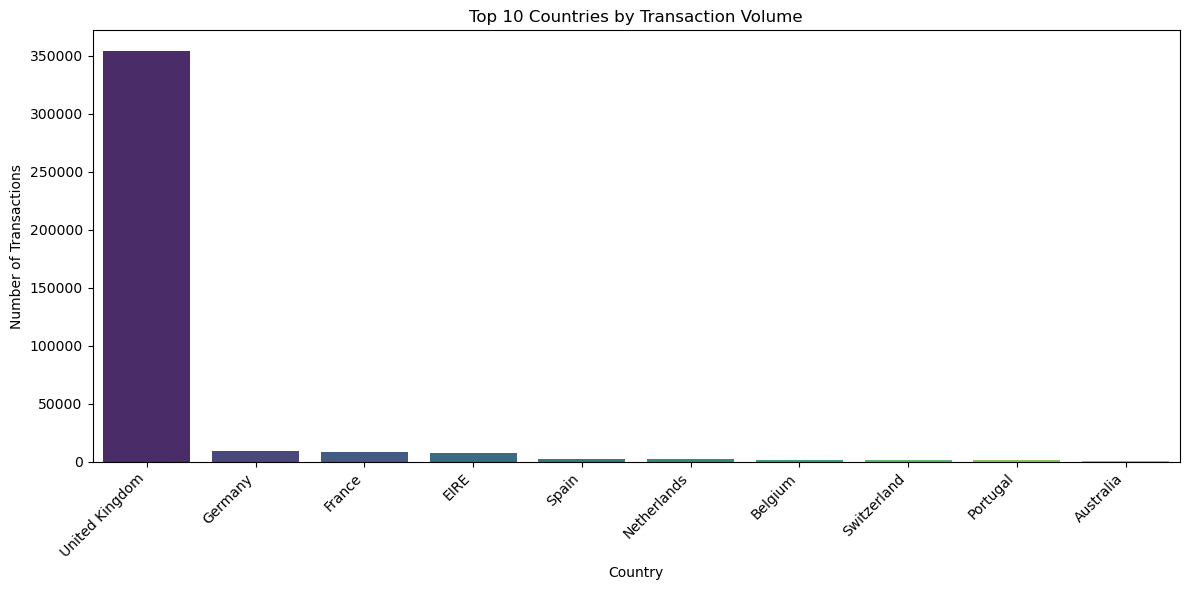

In [19]:
# Analyze transaction volume by country
print("\n--- Transaction Volume by Country (Top 10) ---")
country_transactions = df['Country'].value_counts().head(10)
print(country_transactions)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_transactions.index, y=country_transactions.values, palette='viridis')
plt.title('Top 10 Countries by Transaction Volume')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


--- Top 10 Selling Products (by Quantity) ---
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


C:\Users\hanum\AppData\Local\Temp\ipykernel_38556\4252445023.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_quantity.values, y=top_products_quantity.index, palette='magma')


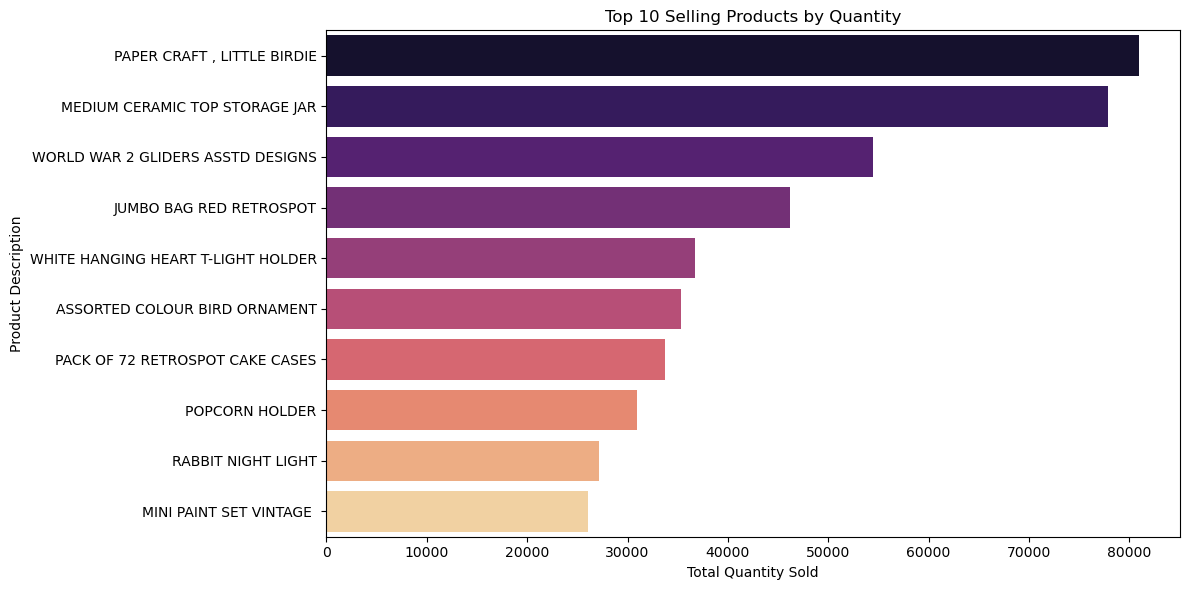

In [21]:
# Identify top-selling products
print("\n--- Top 10 Selling Products (by Quantity) ---")
top_products_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products_quantity)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_quantity.values, y=top_products_quantity.index, palette='magma')
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


--- Top 10 Products by Total Revenue ---
Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64


C:\Users\hanum\AppData\Local\Temp\ipykernel_38556\3405629432.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, palette='plasma')


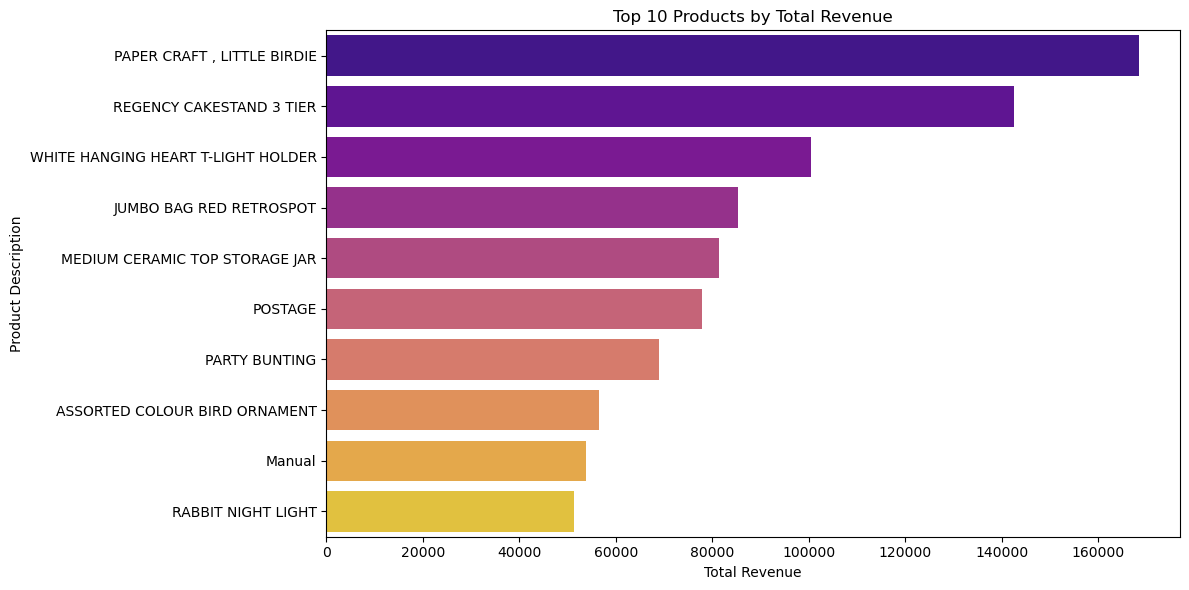

In [22]:

print("\n--- Top 10 Products by Total Revenue ---")
top_products_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(top_products_revenue)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, palette='plasma')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


--- Purchase Trends Over Time ---


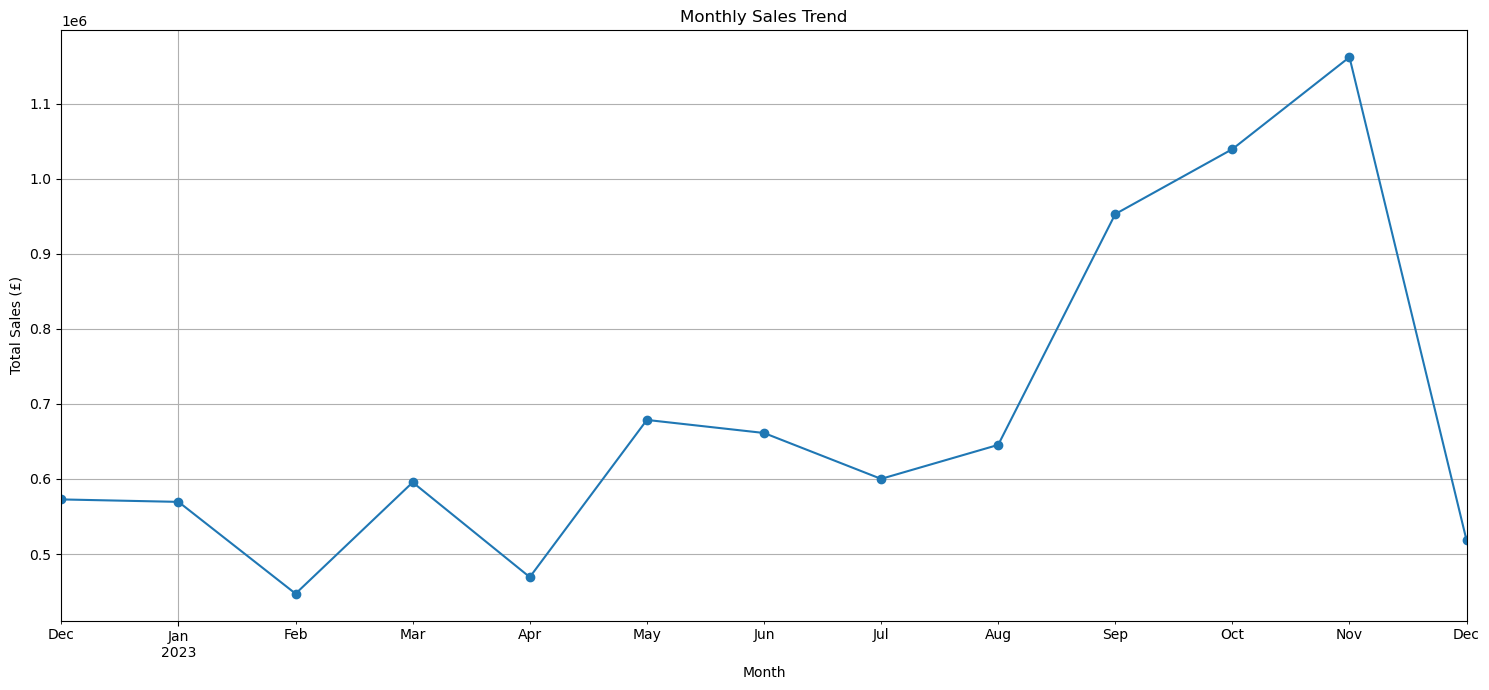

In [23]:
# Visualize purchase trends over time
print("\n--- Purchase Trends Over Time ---")
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

plt.figure(figsize=(15, 7))
monthly_sales.plot(kind='line', marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.grid(True)
plt.tight_layout()
plt.show()


--- Monetary Distribution per Transaction ---


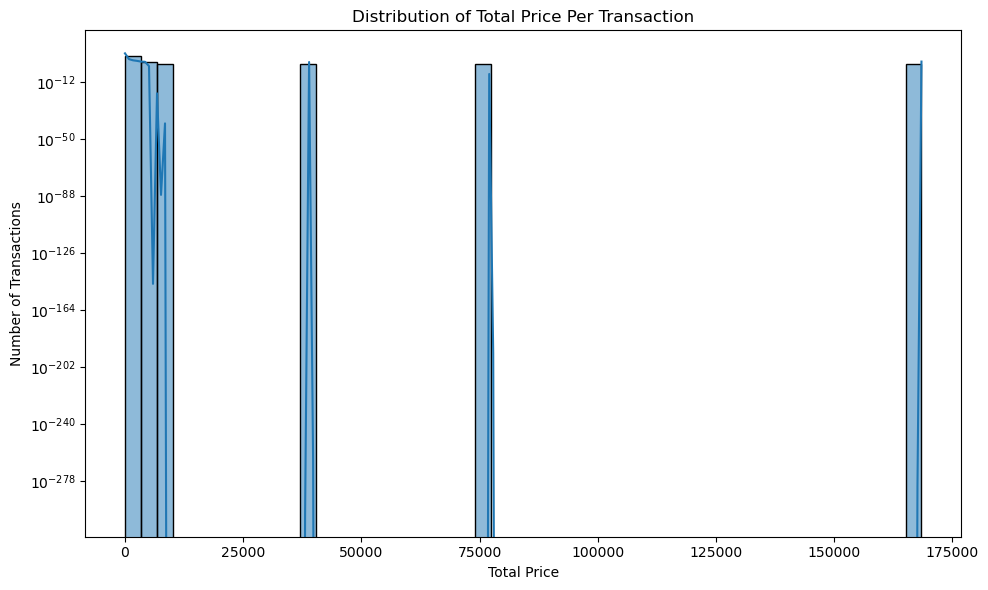

In [24]:
# Inspect monetary distribution per transaction and customer
print("\n--- Monetary Distribution per Transaction ---")
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPrice'], bins=50, kde=True)
plt.title('Distribution of Total Price Per Transaction')
plt.xlabel('Total Price')
plt.ylabel('Number of Transactions')
plt.yscale('log') # Use log scale due to potential outliers
plt.tight_layout()
plt.show()


--- Monetary Distribution per Customer (RFM Monetary) ---


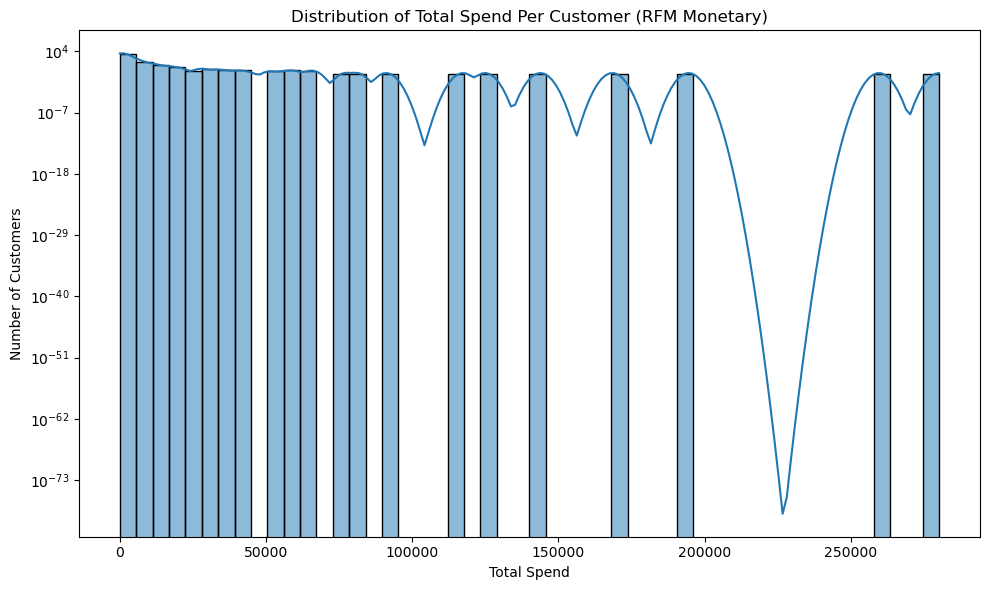

In [25]:
print("\n--- Monetary Distribution per Customer (RFM Monetary) ---")
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['Monetary'], bins=50, kde=True)
plt.title('Distribution of Total Spend Per Customer (RFM Monetary)')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.yscale('log') # Use log scale due to potential outliers
plt.tight_layout()
plt.show()


--- RFM Distributions ---


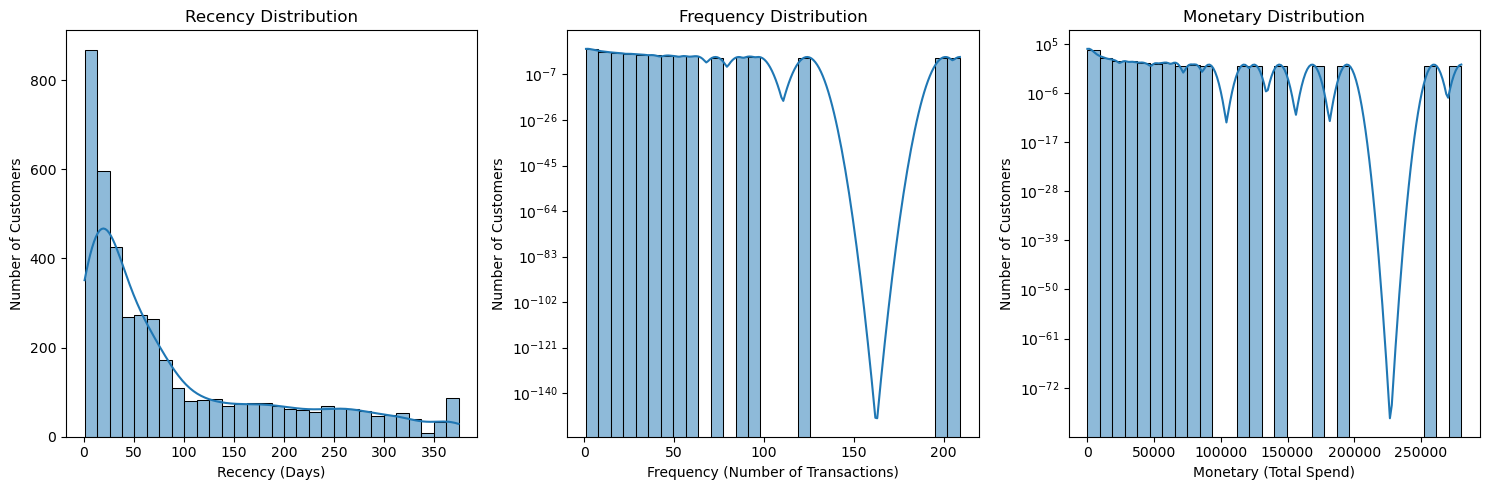

In [26]:
# RFM distributions (histograms for Recency, Frequency, Monetary)
print("\n--- RFM Distributions ---")
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], bins=30, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Recency (Days)')
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], bins=30, kde=True)
plt.title('Frequency Distribution')
plt.xlabel('Frequency (Number of Transactions)')
plt.ylabel('Number of Customers')
plt.yscale('log') # Log scale is often useful for frequency due to skewness

plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], bins=30, kde=True)
plt.title('Monetary Distribution')
plt.xlabel('Monetary (Total Spend)')
plt.ylabel('Number of Customers')
plt.yscale('log') # Log scale is often useful for monetary due to skewness

plt.tight_layout()
plt.show()

# Phase 3: Customer Segmentation (Clustering)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib # For saving the model

### Standardize/Normalize the RFM values

In [30]:
# It's good practice to apply a log transformation first for highly skewed data
# to reduce the effect of outliers before standardization.
# Add a small constant to avoid log(0) if any RFM value is 0.
rfm_df_log = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log1p)

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df_log)
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency_Scaled', 'Frequency_Scaled', 'Monetary_Scaled'])

print("\n--- RFM Values Standardized ---")
print("First 5 rows of scaled RFM DataFrame:")
print(rfm_scaled_df.head())
print("Scaler fitted and RFM values transformed.")


--- RFM Values Standardized ---
First 5 rows of scaled RFM DataFrame:
   Recency_Scaled  Frequency_Scaled  Monetary_Scaled
0        1.461993         -0.955214         3.706225
1       -2.038734          1.074425         1.411843
2        0.373104          0.386304         0.716489
3       -0.623086         -0.955214         0.698739
4        1.424558         -0.955214        -0.618962
Scaler fitted and RFM values transformed.


### Choose Clustering Algorithm (KMeans) and Determine Number of Clusters


--- Running Elbow Method to find optimal K ---


c:\Users\hanum\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\hanum\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\hanum\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hanum\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

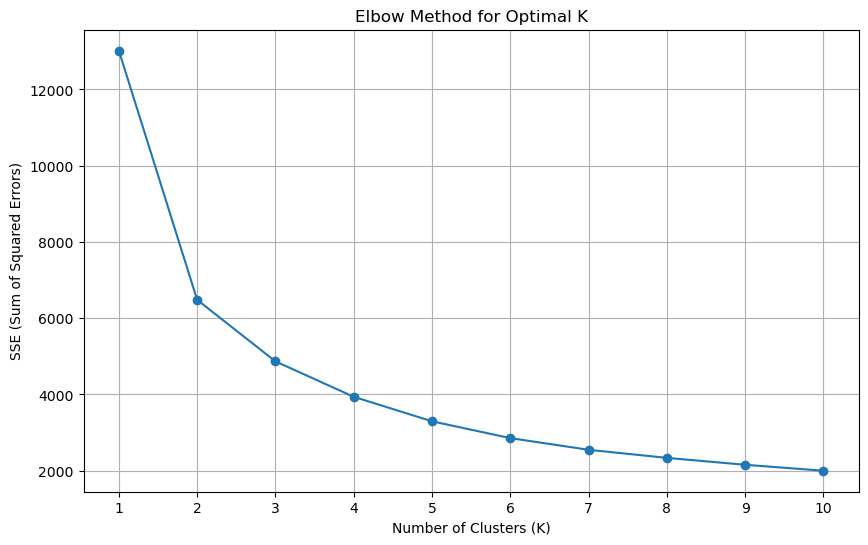

In [31]:
# Elbow Method to find optimal K
print("\n--- Running Elbow Method to find optimal K ---")
sse = {} # Sum of squared distances
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robust centroid initialization
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()


--- Running Silhouette Score to find optimal K ---
K=2: Silhouette Score = 0.4329
K=3: Silhouette Score = 0.3365
K=4: Silhouette Score = 0.3371
K=5: Silhouette Score = 0.3161
K=6: Silhouette Score = 0.3133
K=7: Silhouette Score = 0.3100
K=8: Silhouette Score = 0.3008
K=9: Silhouette Score = 0.2817
K=10: Silhouette Score = 0.2787


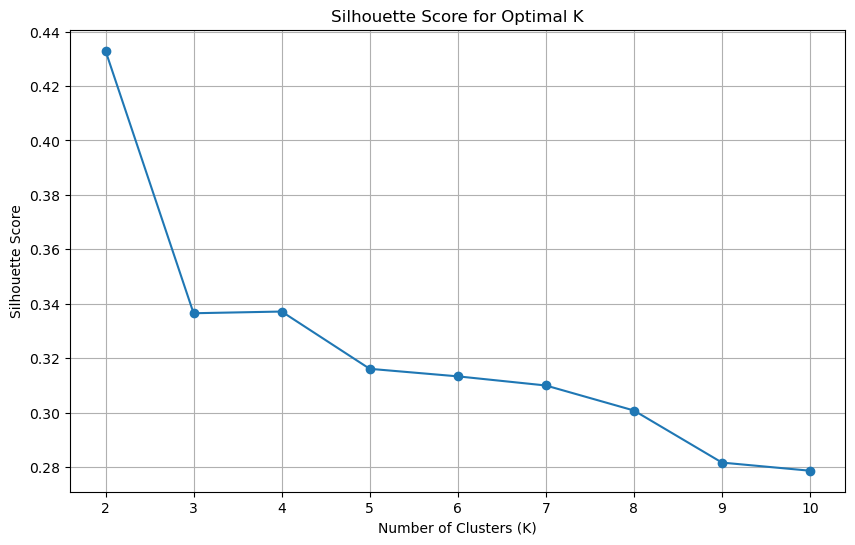

In [32]:
# Silhouette Score to find optimal K (for K > 1)
print("\n--- Running Silhouette Score to find optimal K ---")
silhouette_scores = {}
for k in range(2, 11): # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    score = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_scores[k] = score
    print(f"K={k}: Silhouette Score = {score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.xticks(range(2, 11))
plt.show()

In [33]:
# Based on typical results for this dataset, K=4 or K=3 often gives good results.
# Let's choose K=4 as per the common RFM segmentation strategy (High-Value, Regular, Occasional, At-Risk).
optimal_k = 4
print(f"\nChoosing optimal number of clusters (K) = {optimal_k}")


Choosing optimal number of clusters (K) = 4


### Run Clustering

In [34]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)
print(f"\nKMeans clustering with {optimal_k} clusters completed.")


KMeans clustering with 4 clusters completed.


### Label the clusters by interpreting their RFM averages

In [35]:
# Get the average RFM values for each cluster (using original RFM values for interpretation)
rfm_df_avg = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count' # To see cluster sizes
}).rename(columns={'CustomerID': 'Count'})

In [36]:
# Sort by Monetary for easier interpretation
rfm_df_avg = rfm_df_avg.sort_values(by='Monetary', ascending=False)
print("\n--- RFM Averages for Each Cluster (Sorted by Monetary) ---")
print(rfm_df_avg)


--- RFM Averages for Each Cluster (Sorted by Monetary) ---
            Recency  Frequency     Monetary  Count
Cluster                                           
1         12.131285  13.713687  8074.266872    716
2         71.084399   4.083546  1802.829005   1173
0         18.124253   2.148148   551.819534    837
3        182.496898   1.318238   343.450032   1612


### Define the cluster to segment mapping based on your provided RFM Averages

In [38]:
cluster_to_segment_map = {
    1: 'High-Value',    # Recency=12, Freq=13, Monetary=8074
    2: 'Regular',       # Recency=71, Freq=4, Monetary=1802
    0: 'Occasional',    # Recency=18, Freq=2, Monetary=551
    3: 'At-Risk'        # Recency=182, Freq=1, Monetary=343
}

print("\nAssigned Cluster to Segment Mapping:")
print(cluster_to_segment_map)


Assigned Cluster to Segment Mapping:
{1: 'High-Value', 2: 'Regular', 0: 'Occasional', 3: 'At-Risk'}


In [39]:
rfm_df['Segment'] = rfm_df['Cluster'].map(cluster_to_segment_map)

print("\n--- Customer Segments Assigned ---")
print("Count of customers per segment:")
print(rfm_df['Segment'].value_counts())
print("\nSample of RFM DataFrame with Segments:")
print(rfm_df.head())


--- Customer Segments Assigned ---
Count of customers per segment:
Segment
At-Risk       1612
Regular       1173
Occasional     837
High-Value     716
Name: count, dtype: int64

Sample of RFM DataFrame with Segments:
   CustomerID  Recency  Frequency  Monetary  Cluster     Segment
0     12346.0      326          1  77183.60        2     Regular
1     12347.0        2          7   4310.00        1  High-Value
2     12348.0       75          4   1797.24        2     Regular
3     12349.0       19          1   1757.55        0  Occasional
4     12350.0      310          1    334.40        3     At-Risk


### Visualize the clusters using a scatter plot or 3D plot of RFM scores


--- Visualizing Clusters ---


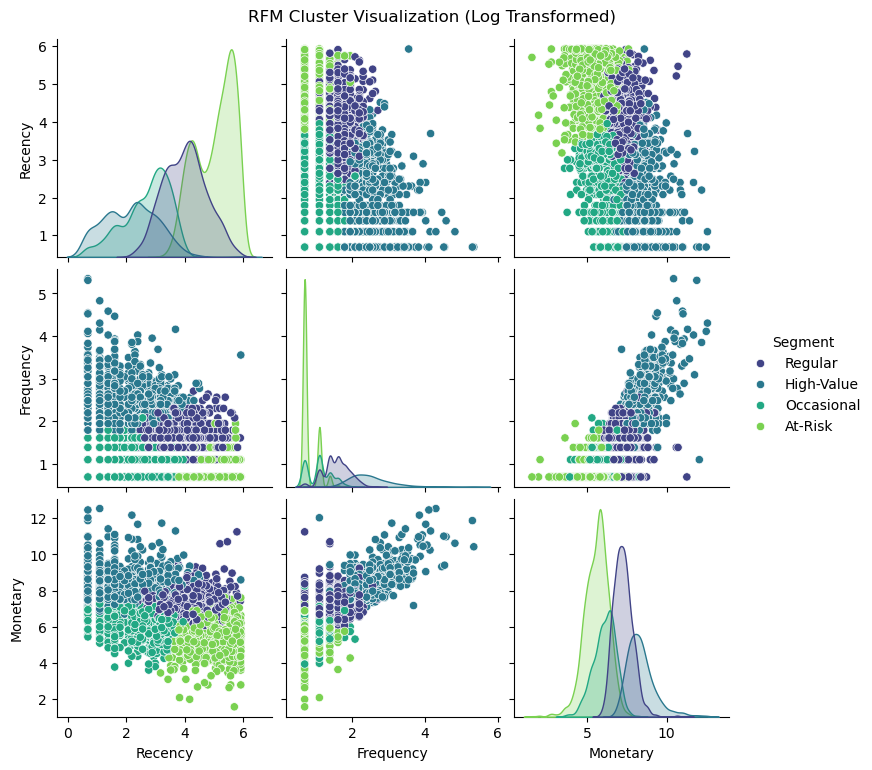

In [40]:
print("\n--- Visualizing Clusters ---")
# Pairplot is good for visualizing relationships between RFM variables colored by segment
sns.pairplot(rfm_df_log.assign(Segment=rfm_df['Segment']), hue='Segment', diag_kind='kde', palette='viridis')
plt.suptitle('RFM Cluster Visualization (Log Transformed)', y=1.02)
plt.show()

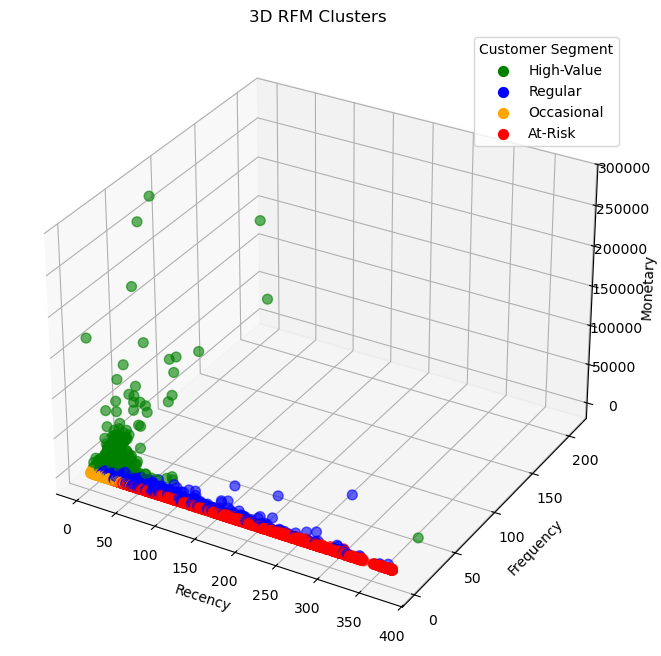

In [41]:
# 3D plot (requires mpl_toolkits.mplot3d)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Using original RFM values for better interpretability in 3D plot
# Assign colors based on mapped segments for consistency
segment_colors = {
    'High-Value': 'green',
    'Regular': 'blue',
    'Occasional': 'orange',
    'At-Risk': 'red'
}
colors = rfm_df['Segment'].map(segment_colors)

ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'],
           c=colors, s=50, alpha=0.6)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D RFM Clusters')

# Create custom legend
for segment, color in segment_colors.items():
    ax.scatter([], [], [], c=color, label=segment, s=50) # Empty scatter for legend proxy
ax.legend(title="Customer Segment")

plt.show()


### Model Evaluation for Clustering (Inertia, Silhouette Score)

In [42]:
# Inertia (SSE) is already calculated in the elbow method loop.
# Silhouette Score is already calculated in its respective loop.
print(f"\nModel Evaluation for chosen K={optimal_k}:")
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_kmeans.fit(rfm_scaled)
print(f"Final Model Inertia (SSE): {final_kmeans.inertia_:.2f}")
if optimal_k > 1:
    print(f"Final Model Silhouette Score: {silhouette_score(rfm_scaled, final_kmeans.labels_):.4f}")



Model Evaluation for chosen K=4:
Final Model Inertia (SSE): 3938.51
Final Model Silhouette Score: 0.3371


### Save the best performing model for streamlit usage

In [43]:
# Save the KMeans model and the StandardScaler
model_filepath = 'kmeans_model.joblib'
scaler_filepath = 'scaler.joblib'
map_filepath = 'cluster_segment_map.joblib'

joblib.dump(final_kmeans, model_filepath)
joblib.dump(scaler, scaler_filepath)
joblib.dump(cluster_to_segment_map, map_filepath) # Save the mapping too!

print(f"\nKMeans model saved to {model_filepath}")
print(f"StandardScaler saved to {scaler_filepath}")
print(f"Cluster to Segment Map saved to {map_filepath}")


KMeans model saved to kmeans_model.joblib
StandardScaler saved to scaler.joblib
Cluster to Segment Map saved to cluster_segment_map.joblib


# Phase 4: Product Recommendation System Development

In [44]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

### Implement Item-based Collaborative Filtering

In [46]:
# Aggregate quantity per customer per product
customer_product_df = df.groupby(['CustomerID', 'Description'])['Quantity'].sum().reset_index()

# Create the user-item matrix (pivot table)
# Fill NaN with 0 to indicate no purchase of that item by that customer
user_item_matrix = customer_product_df.pivot_table(index='CustomerID', columns='Description', values='Quantity').fillna(0)

print("\n--- User-Item Matrix Created ---")
print("Shape of User-Item Matrix:", user_item_matrix.shape)
print("Sample of User-Item Matrix (first 5 rows, first 5 columns):")
print(user_item_matrix.iloc[:5, :5])



--- User-Item Matrix Created ---
Shape of User-Item Matrix: (4338, 3877)
Sample of User-Item Matrix (first 5 rows, first 5 columns):
Description  4 PURPLE FLOCK DINNER CANDLES  50'S CHRISTMAS GIFT BAG LARGE  \
CustomerID                                                                  
12346.0                                0.0                            0.0   
12347.0                                0.0                            0.0   
12348.0                                0.0                            0.0   
12349.0                                0.0                            0.0   
12350.0                                0.0                            0.0   

Description  DOLLY GIRL BEAKER  I LOVE LONDON MINI BACKPACK  \
CustomerID                                                    
12346.0                    0.0                          0.0   
12347.0                    0.0                          0.0   
12348.0                    0.0                          0.0   
12349.0    

In [47]:
# Convert the user-item matrix to a sparse matrix to save memory
# This is highly recommended for large datasets
user_item_sparse_matrix = csr_matrix(user_item_matrix.values)
print("\nUser-Item Matrix converted to sparse format.")


User-Item Matrix converted to sparse format.


### Compute cosine similarity between products

In [48]:
# Transpose the matrix to get Item-User matrix for item-item similarity
item_user_matrix = user_item_matrix.T

# Convert item-user matrix to sparse for efficient similarity calculation
item_user_sparse_matrix = csr_matrix(item_user_matrix.values)
print("Item-User Matrix created and converted to sparse format.")

# Calculate cosine similarity between items
# The result will be a square matrix where item_similarity_df[i, j] is similarity between item i and item j
item_similarity_matrix = cosine_similarity(item_user_sparse_matrix)
item_similarity_df = pd.DataFrame(item_similarity_matrix, index=item_user_matrix.index, columns=item_user_matrix.index)

print("\n--- Item-Item Cosine Similarity Matrix Computed ---")
print("Shape of Item-Item Similarity Matrix:", item_similarity_df.shape)
print("Sample of Item-Item Similarity Matrix (first 5x5):")
print(item_similarity_df.iloc[:5, :5])

Item-User Matrix created and converted to sparse format.

--- Item-Item Cosine Similarity Matrix Computed ---
Shape of Item-Item Similarity Matrix: (3877, 3877)
Sample of Item-Item Similarity Matrix (first 5x5):
Description                    4 PURPLE FLOCK DINNER CANDLES  \
Description                                                    
4 PURPLE FLOCK DINNER CANDLES                       1.000000   
50'S CHRISTMAS GIFT BAG LARGE                       0.000000   
DOLLY GIRL BEAKER                                   0.000021   
I LOVE LONDON MINI BACKPACK                         0.000227   
I LOVE LONDON MINI RUCKSACK                         0.000000   

Description                    50'S CHRISTMAS GIFT BAG LARGE  \
Description                                                    
4 PURPLE FLOCK DINNER CANDLES                       0.000000   
50'S CHRISTMAS GIFT BAG LARGE                       1.000000   
DOLLY GIRL BEAKER                                   0.003533   
I LOVE LONDON MINI 

### Develop a function to return the top 5 similar products to an entered product name

In [49]:
def get_top_n_recommendations(product_description, item_similarity_df, user_item_matrix, n=5):
    
    # Check if the product exists in our similarity matrix
    if product_description not in item_similarity_df.columns:
        print(f"Product '{product_description}' not found in the dataset.")
        return []

    # Get the similarity scores for the given product with all other products
    product_similarities = item_similarity_df[product_description]

    # Sort the products by similarity in descending order
    # Exclude the product itself from the recommendations
    similar_products = product_similarities.sort_values(ascending=False).index.tolist()
    similar_products.remove(product_description) # Remove self

    # Return the top N similar products
    return similar_products[:n]

print("\n--- Recommendation Function Defined ---")


--- Recommendation Function Defined ---


In [50]:
# Test the recommendation function
test_product = 'WHITE HANGING HEART T-LIGHT HOLDER'
recommendations = get_top_n_recommendations(test_product, item_similarity_df, user_item_matrix, n=5)
print(f"\nTop 5 recommendations for '{test_product}':")
if recommendations:
    for i, product in enumerate(recommendations):
        print(f"{i+1}. {product}")
else:
    print("No recommendations found.")

# Try a product that might not be in the list
test_product_missing = 'NON-EXISTENT PRODUCT'
recommendations_missing = get_top_n_recommendations(test_product_missing, item_similarity_df, user_item_matrix, n=5)



Top 5 recommendations for 'WHITE HANGING HEART T-LIGHT HOLDER':
1. GIN + TONIC DIET METAL SIGN
2. RED HANGING HEART T-LIGHT HOLDER
3. WASHROOM METAL SIGN
4. LAUNDRY 15C METAL SIGN
5. GREEN VINTAGE SPOT BEAKER
Product 'NON-EXISTENT PRODUCT' not found in the dataset.


### Save the necessary components for Streamlit

In [51]:
# Save the item_similarity_df and the list of all product descriptions
joblib.dump(item_similarity_df, 'item_similarity_df.joblib')
joblib.dump(user_item_matrix.columns.tolist(), 'all_product_descriptions.joblib') # Save all product names for Streamlit dropdown

print(f"\nItem similarity matrix saved to 'item_similarity_df.joblib'")
print(f"All product descriptions saved to 'all_product_descriptions.joblib'")


Item similarity matrix saved to 'item_similarity_df.joblib'
All product descriptions saved to 'all_product_descriptions.joblib'
